# Intelligent Individuals

Shivani Hukkeri<br>
August 2, 2024


## Introduction

---



The dataset title “Top Intelligent People in the World” offers an interesting glimpse into the academic lives and achievements of some of the most intellectually gifted individuals across the globe. This dataset provides detailed records of 5,000 leading minds on various aspects including their names, professions, contributions, and IQ scores. It serves as a valuable resource for understanding the characteristics and backgrounds of these individuals, and provides a basis for comparative analysis and insights into human intelligence. This project aims to ascertain how the educational background of some of the world’s most intelligent people influenced their fields of expertise and the types of achievements they attained while also exploring other motivations.
<br>
<br>
I was also particularly interested in understanding how we could characterize intelligence in addition to quantitative measures such as IQ, and what different factors could contribute to high intelligence. Such factors could include education, environment, personal interests, and more. This dataset includes individuals from the year 1900 to 2000, which offers us the opportunity to explore how different cultures and time periods have cultivated intelligence. We can further explore how historical and cultural factors influenced intelligence and the achievements brought forth by the recorded individuals. Since the dataset includes both male and female individuals, we can further analyze how historical perspectives coupled with educational opportunities offered affected the intelligence/contributions of women compared to men. The dataset further includes the individuals’ country of origin, which can shed light on the educational resources available in each country and how these resources may have impacted the number of highly intelligent individuals it produced or the types of achievements they attained.
<br>
<br>
Amongst the above motivations that drive my exploration of this dataset, below are some of the questions that I seek to address:
- Which fields of expertise do the most intelligent people excel in? Are there certain professions or areas of study that attract high IQ individuals more than others?
- How has the recognition and distribution of high intelligence changed over time? Are there historical periods that produced more recognized geniuses?
- Is there a correlation between IQ scores and the level of achievement or impact these individuals have had in their respective fields?
- What are the demographic patterns amongst the top intelligent people? Are there commonalities in age, gender, nationality, or educational background?
- What environmental factors (e.g. socioeconomic status, educational background, cultural influences, etc) are common amongst these individuals? How do these factors influence the development of high intelligence?

These findings will primarily be revealed in our preliminary analysis.


## Methods

---



In [134]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# import sys
# sys.path.append('/content/drive/My Drive/Colab-Notebooks/DH140/')

In [ ]:
!pip cache purge

In [ ]:
# to run in binder
!pip install -r requirements.txt

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install nltk
!pip install scikit-learn
!pip install seaborn


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [137]:
# load dataset in Google
# df = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/DH140/intelligent_people.csv')

In [2]:
# load dataset locally
df = pd.read_csv('intelligent_people.csv')

In [3]:
df.head() # view the top 5 rows

,Name,Country,Field of Expertise,IQ,Achievements,Birth Year,Gender,Notable Works,Awards,Education,Influence
0,Enrico Fermi,Austria,Polymath,199,Father of Computer Science,1968,Female,E=mc²,Numerous Posthumous,Self-taught,Popularizing science and cosmology
1,Max Planck,Italy,Chemistry,159,Theory of Evolution,1986,Female,Bohr Model,Nobel Prize,Ph.D. in Astronomy,Foundational work in quantum mechanics
2,Paul Dirac,UK,Physics,177,Quantum Mechanics,1927,Female,Cosmos,Nobel Prize,Ph.D. in Mathematics,Foundation of classical mechanics
3,Erwin Schrödinger,Italy,Physics,130,Electromagnetic Induction,1921,Female,Discovery of Electromagnetic Induction,Nobel Prize,University of Cambridge,Iconic Renaissance artist and inventor
4,Paul Dirac,UK,Physics,163,Wave Equation,1964,Female,On Computable Numbers,Nobel Prize,Ph.D. (honorary),Foundational work in quantum mechanics


In [4]:
df.columns

Index(['Name', 'Country', 'Field of Expertise', 'IQ', 'Achievements',
       'Birth Year', 'Gender', 'Notable Works', 'Awards', 'Education',
       'Influence'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                5000 non-null   object
 1   Country             5000 non-null   object
 2   Field of Expertise  5000 non-null   object
 3   IQ                  5000 non-null   int64 
 4   Achievements        5000 non-null   object
 5   Birth Year          5000 non-null   int64 
 6   Gender              5000 non-null   object
 7   Notable Works       5000 non-null   object
 8   Awards              3751 non-null   object
 9   Education           5000 non-null   object
 10  Influence           5000 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [142]:
# df.describe(include='all') # summary info abt categorical data
df.describe()

,IQ,Birth Year
count,5000.000000,5000.000000
mean,164.765200,1949.527400
std,20.524169,29.024806
min,130.000000,1900.000000
25%,147.000000,1924.000000
50%,165.000000,1950.000000
75%,182.000000,1974.000000
max,200.000000,2000.000000


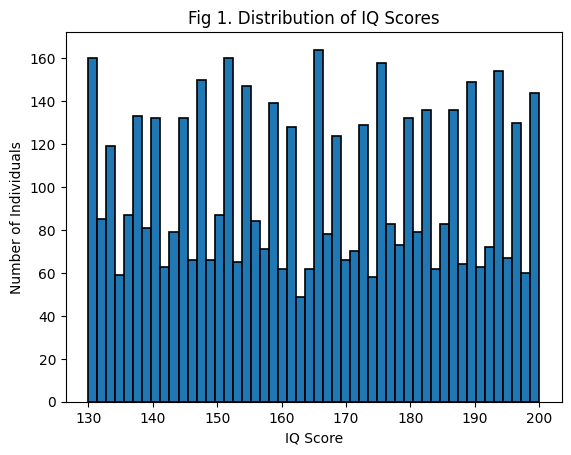

In [143]:
df['IQ'].plot(kind='hist', bins=50, edgecolor='black', linewidth=1.2)
plt.title('Fig 1. Distribution of IQ Scores')
plt.xlabel('IQ Score')
plt.ylabel('Number of Individuals')
plt.show()

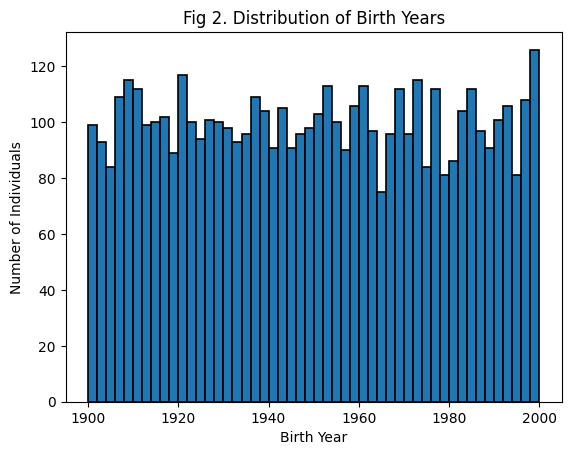

In [144]:
df['Birth Year'].plot(kind='hist', bins=50, edgecolor='black', linewidth=1.2)
plt.title('Fig 2. Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Individuals')
plt.show()

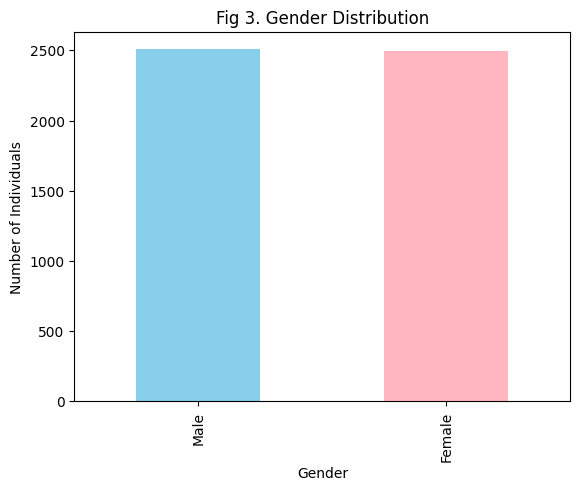

In [145]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Fig 3. Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.show()

In [146]:
df["Country"].value_counts()

Country
UK         2235
USA         987
Italy       786
Denmark     257
France      249
Germany     245
Austria     241
Name: count, dtype: int64

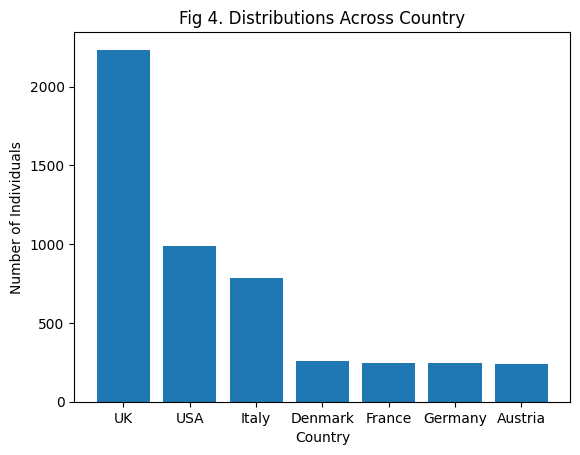

In [147]:
country_counts = df['Country'].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.title("Fig 4. Distributions Across Country")
plt.xlabel("Country")
plt.ylabel("Number of Individuals")
plt.show()

In [148]:
field_of_expertise = df.groupby(by="Field of Expertise").mean(numeric_only=True)
field_of_expertise

,IQ,Birth Year
Field of Expertise,,
Astronomy,164.297552,1950.907721
Biology,164.629344,1952.073359
Chemistry,165.648330,1948.477407
Engineering,163.160920,1947.379310
Mathematics,165.058586,1948.308081
Physics,164.898328,1949.896069
Polymath,163.362869,1949.924051


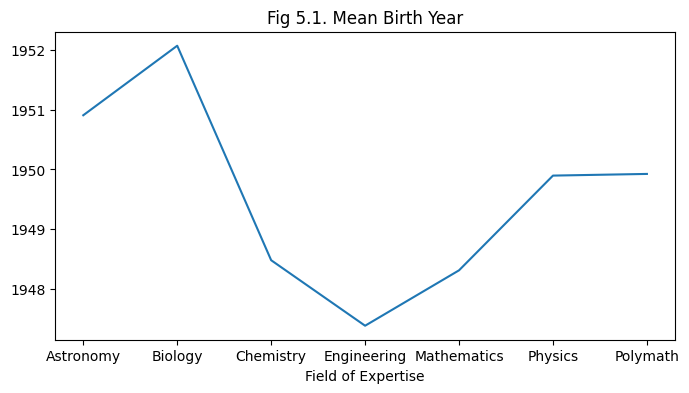

In [149]:
field_of_expertise['Birth Year'].plot(kind='line', figsize=(8, 4), title='Fig 5.1. Mean Birth Year')
plt.show()

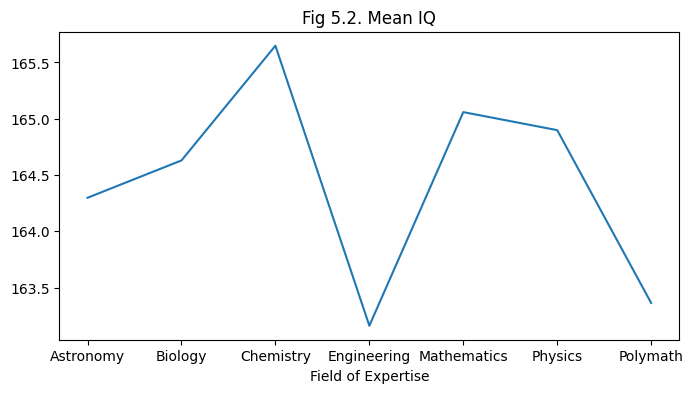

In [150]:
field_of_expertise['IQ'].plot(kind='line', figsize=(8, 4), title='Fig 5.2. Mean IQ')
plt.show()

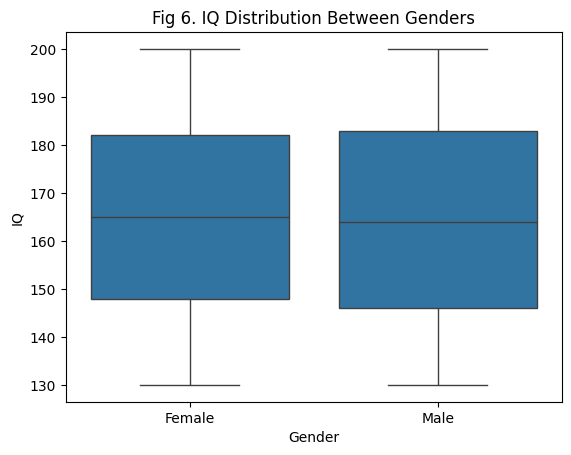

In [151]:
sns.boxplot(y="IQ", x="Gender", data=df)
plt.title("Fig 6. IQ Distribution Between Genders")
plt.show()

The dataset consists of 5,000 individuals and their names, country of origin, field of expertise, IQ, achievements, birth year, gender, notable works, awards, education, and influence. The dataset contains 5,000 non-null values in every column except for “Awards,” which has 3,751 non-null values. This discrepancy may be due to individuals not having received any awards despite their intelligence, or the data could be missing as well. We also need to address the limitations of this dataset when trying to answer our questions. For example, if we are trying to compare individuals’ achievements between genders, we need to take into account the gender distribution. Analysis would be skewed if the dataset contains a disproportionate amount of men and women. Though the dataset’s only numeric columns consist of IO and Birth Year, we can convert the Gender column by assigning its “Female” and “Male” values, 0 and 1 respectively when conducting further analysis. For example, if we were to try to predict the field of expertise based on factors such as IQ, Birth Year, and Gender, we can convert its categorical values to numerical values to better apply an ML algorithm.
<br>
<br>
Preliminary analysis showed that the IQ values noted of these individuals ranged from 130 to 200, with a mean of 164.75 and a uniform distribution (presented in Figure 1) and the Birth Year ranged from 1900 to 2000. Figure 2 indicates that there is an uniform distribution of individuals recorded per 20 years over the course of a millenia, which may aid in providing more reasonable inferences when analyzing change over time. Figure 3 shows us that there is an even number of women and men present in the data, which allows us to make more accurate comparisons. Further exploratory data analysis indicates that there are a large number of people originating from the United Kingdom in the dataset (Figure 4); 2,235 to be exact, while six other countries make up the remaining records. Figures 5.1 and 5.2 present a similar mean IQ value and mean birth year across different fields of expertise, showing that the average IQ of people was more or less the same across all the fields of study. It’s interesting to note that the Engineering field had the lowest mean birth year, while Biology had the highest mean birth year. This might suggest that intelligent people in Engineering were born in the earlier part of the century, whereas those in Biology were born in the latter part of the century.

## Results

---



In [91]:
print(df["Achievements"].unique())

['Father of Computer Science' 'Theory of Evolution' 'Quantum Mechanics'
 'Electromagnetic Induction' 'Wave Equation' 'Quantum Theory'
 'First computer algorithm' 'General Theory of Relativity'
 'Heliocentric Theory' 'Nuclear Reactor' 'AC Electricity, Tesla Coil'
 'Cosmos Series' 'Theory of Relativity' 'Laws of Motion'
 'Quantum Electrodynamics' 'Mona Lisa, The Last Supper, Inventions'
 'Discovery of Radium and Polonium' 'Black Hole Theory'
 'Electromagnetic Theory']


In [92]:
achievements_count = df["Achievements"].value_counts()
achievements_count

Achievements
Quantum Mechanics                         512
Father of Computer Science                285
Electromagnetic Theory                    277
Quantum Electrodynamics                   267
Cosmos Series                             263
Theory of Evolution                       262
AC Electricity, Tesla Coil                258
Quantum Theory                            257
General Theory of Relativity              254
Wave Equation                             247
Theory of Relativity                      244
Black Hole Theory                         244
Heliocentric Theory                       240
Discovery of Radium and Polonium          240
First computer algorithm                  236
Electromagnetic Induction                 235
Laws of Motion                            228
Nuclear Reactor                           226
Mona Lisa, The Last Supper, Inventions    225
Name: count, dtype: int64

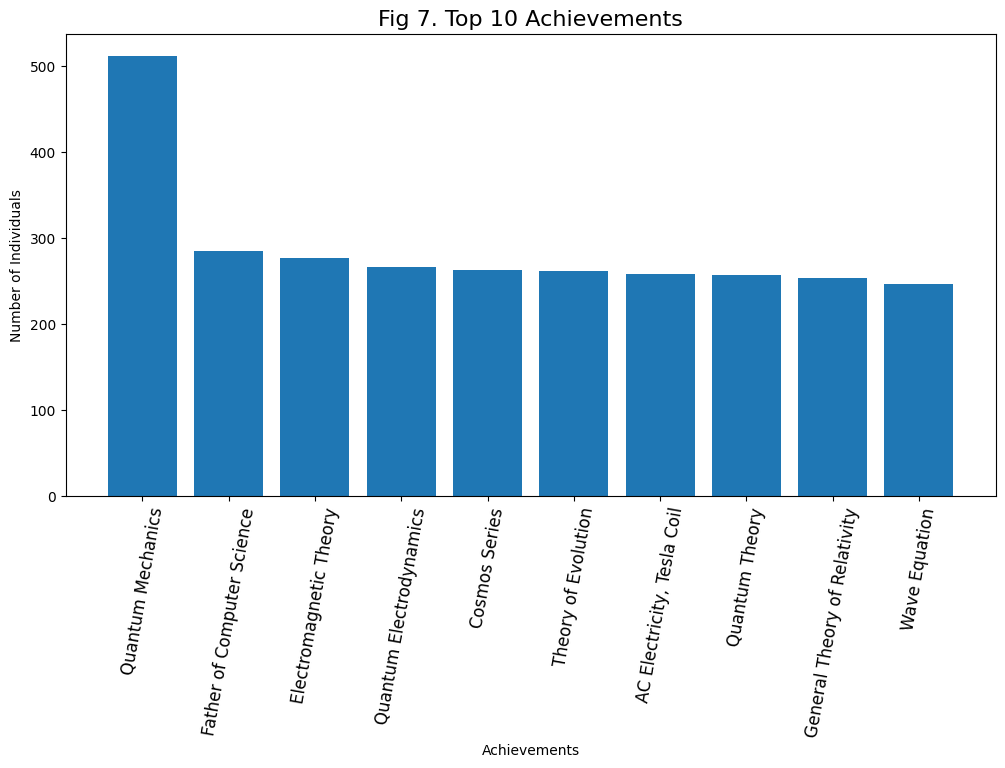

In [152]:
plt.figure(figsize = (12,6))
plt.bar(achievements_count.index[:10], achievements_count[:10])
plt.title("Fig 7. Top 10 Achievements", fontsize=16)
plt.xlabel("Achievements")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=80, fontsize=12)
plt.show()

In [107]:
print(df["Notable Works"].unique())

['E=mc²' 'Bohr Model' 'Cosmos' 'Discovery of Electromagnetic Induction'
 'On Computable Numbers' 'Various Patents'
 'Dialogue Concerning the Two Chief World Systems'
 'Theory of Electromagnetism' 'Research on radioactivity' 'Quantum Theory'
 'On the Origin of Species' 'A Brief History of Time'
 'Philosophiæ Naturalis Principia Mathematica' 'Feynman Lectures'
 'Dirac Equation' 'Penrose Diagram' 'Vitruvian Man' 'Schrödinger Equation'
 'Fermi Paradox' 'Notes on the Analytical Engine']


In [108]:
notable_works_count = df["Notable Works"].value_counts()
notable_works_count

Notable Works
Dirac Equation                                     284
Quantum Theory                                     278
Cosmos                                             277
Discovery of Electromagnetic Induction             266
On the Origin of Species                           265
Research on radioactivity                          259
Fermi Paradox                                      254
Dialogue Concerning the Two Chief World Systems    252
Bohr Model                                         251
Vitruvian Man                                      248
Philosophiæ Naturalis Principia Mathematica        244
On Computable Numbers                              241
Various Patents                                    241
Feynman Lectures                                   238
Penrose Diagram                                    235
Notes on the Analytical Engine                     235
A Brief History of Time                            234
Theory of Electromagnetism                         

In [110]:
# df.loc[df['Notable Works'] == "E=mc²"]

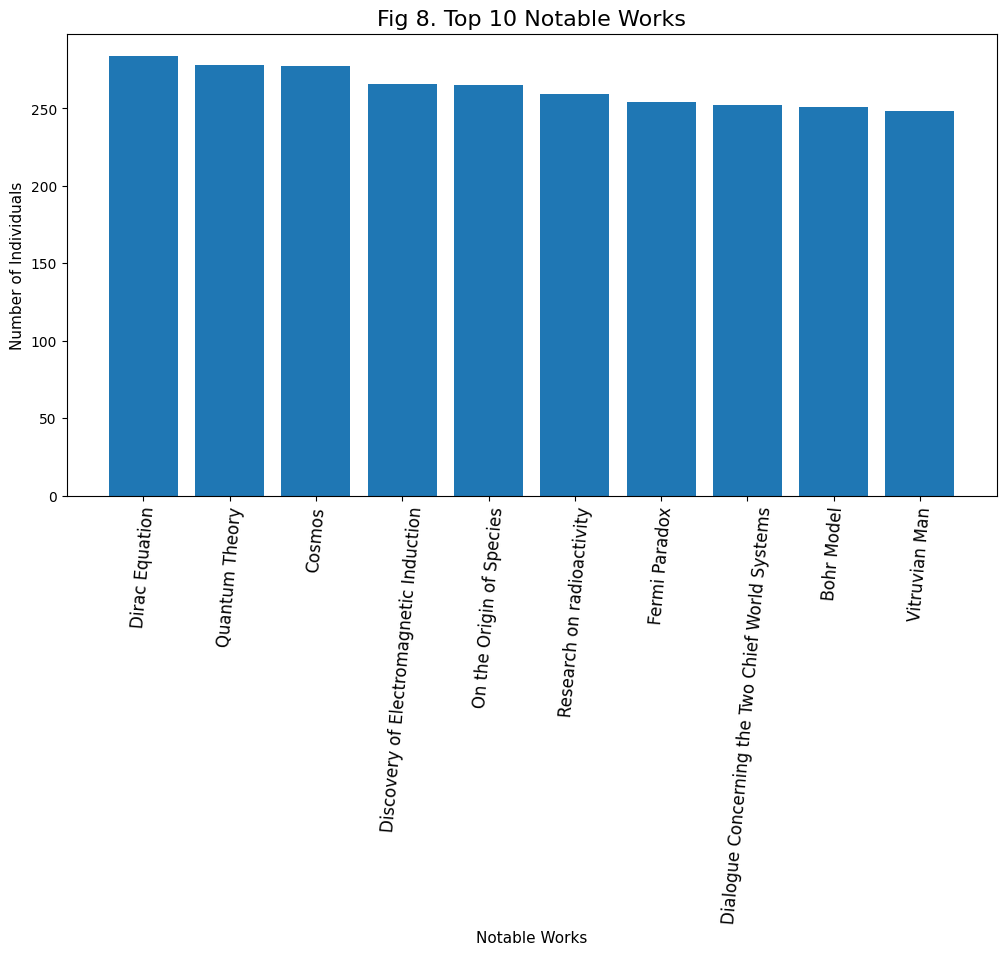

In [185]:
plt.figure(figsize = (12,6))
plt.bar(notable_works_count.index[:10], notable_works_count[:10])
plt.title("Fig 8. Top 10 Notable Works", fontsize=16)
plt.xlabel("Notable Works", fontsize=11)
plt.ylabel("Number of Individuals", fontsize=11)
plt.xticks(rotation=85, fontsize=12)
plt.show()

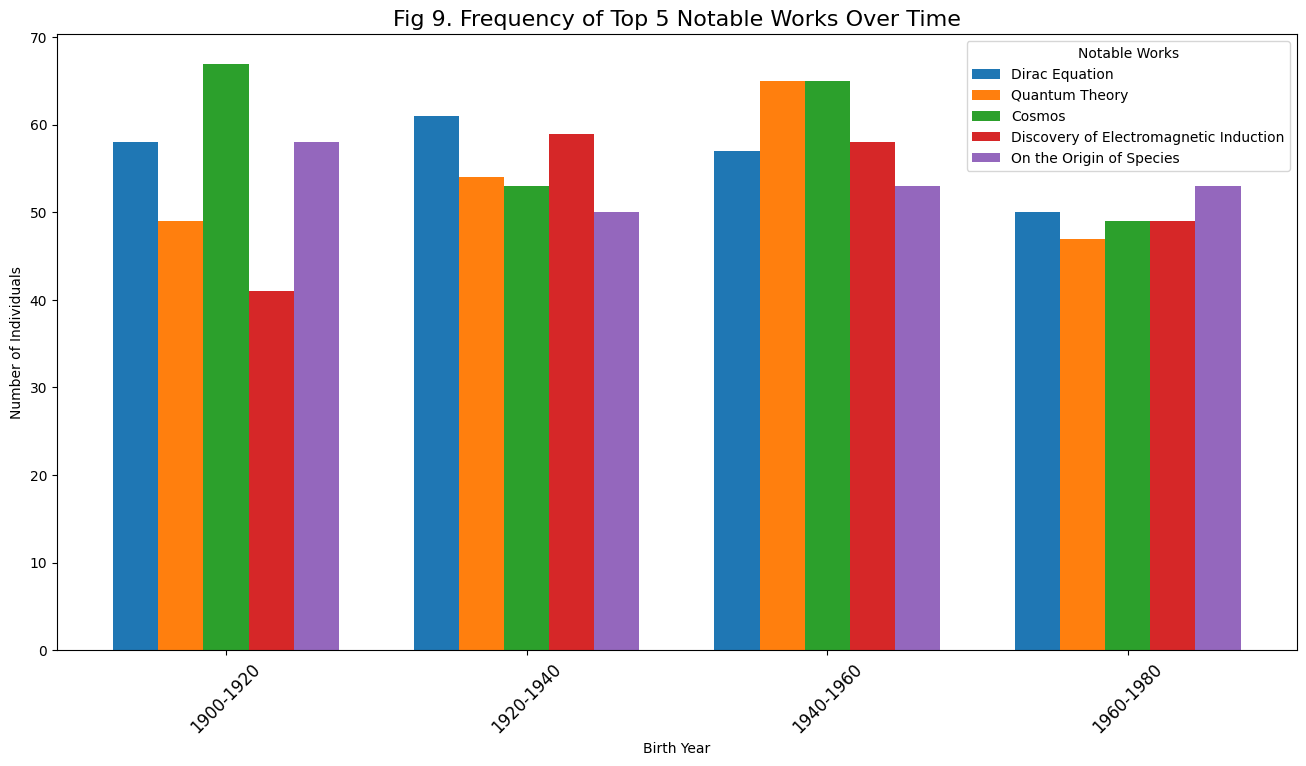

In [186]:
# define the bin edges for 20-year intervals
bins = range(1900, 2000, 20)
labels = [f"{year}-{year+20}" for year in bins[:-1]]

# 'Period' column based on the bins
df['Period'] = pd.cut(df['Birth Year'], bins=bins, labels=labels, right=False)
top_works = notable_works_count.index[:5]

# store counts of top 5 notable works by period
grouped_counts = pd.DataFrame()
for work in top_works:
    work_counts = df[df['Notable Works'] == work].groupby('Period').size()
    grouped_counts[work] = work_counts

fig, ax = plt.subplots(figsize=(16, 8))
width = 0.15
x = range(len(grouped_counts))  # X locations for groups

for i, work in enumerate(top_works):
    ax.bar([p + width * i for p in x], grouped_counts[work], width=width, label=work)

ax.set_xlabel('Birth Year')
ax.set_ylabel('Number of Individuals')
ax.set_title('Fig 9. Frequency of Top 5 Notable Works Over Time', fontsize=16)
ax.set_xticks([p + width * (len(top_works) - 1) / 2 for p in x])
ax.set_xticklabels(labels, rotation=45, fontsize=12)
ax.legend(title='Notable Works')
plt.show()

In [168]:
# filtered_df = df[(df['Birth Year'] >= 1900) & (df['Birth Year'] < 1920) & (df['Notable Works'] == "Dirac Equation")]
# filtered_df

In [169]:
awards_count = df["Awards"].value_counts()
awards_count

Awards
Nobel Prize            1951
Numerous Honors         505
Royal Medal             274
Pulitzer Prize          270
Two Nobel Prizes        253
Numerous Posthumous     251
Copley Medal            247
Name: count, dtype: int64

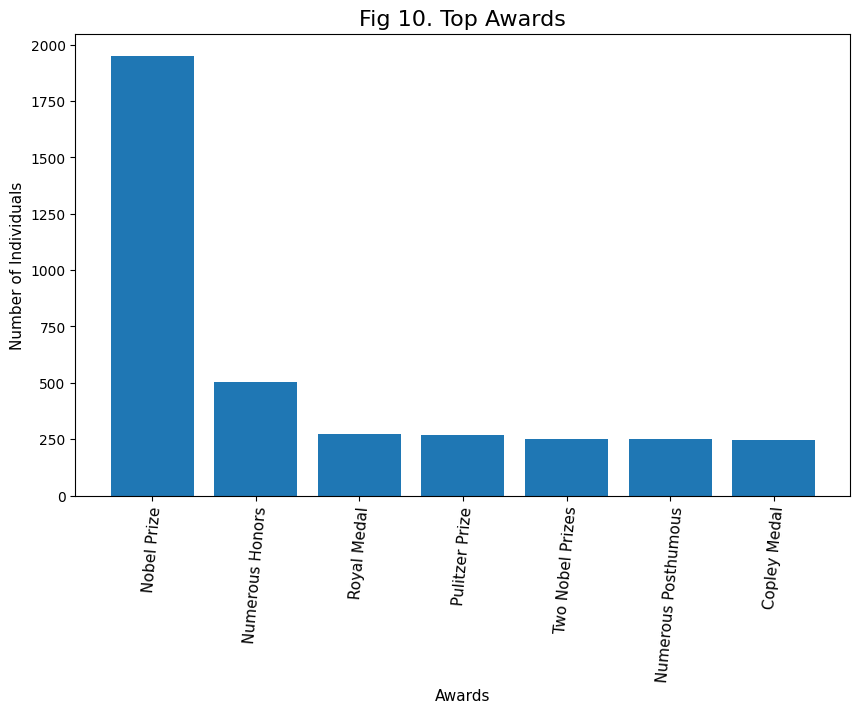

In [187]:
plt.figure(figsize = (10,6))
plt.bar(awards_count.index, awards_count)
plt.title("Fig 10. Top Awards", fontsize=16)
plt.xlabel("Awards", fontsize=11)
plt.ylabel("Number of Individuals", fontsize=11)
plt.xticks(rotation=85, fontsize=11)
plt.show()

In [181]:
education_count = df["Education"].value_counts()
education_count

Education
Ph.D. in Physics           1796
Ph.D. in Mathematics        727
Self-taught                 706
Ph.D. in Chemistry          531
Ph.D. in Astronomy          266
Ph.D. (honorary)            265
University of Cambridge     243
University of Pisa          234
Ph.D.                       232
Name: count, dtype: int64

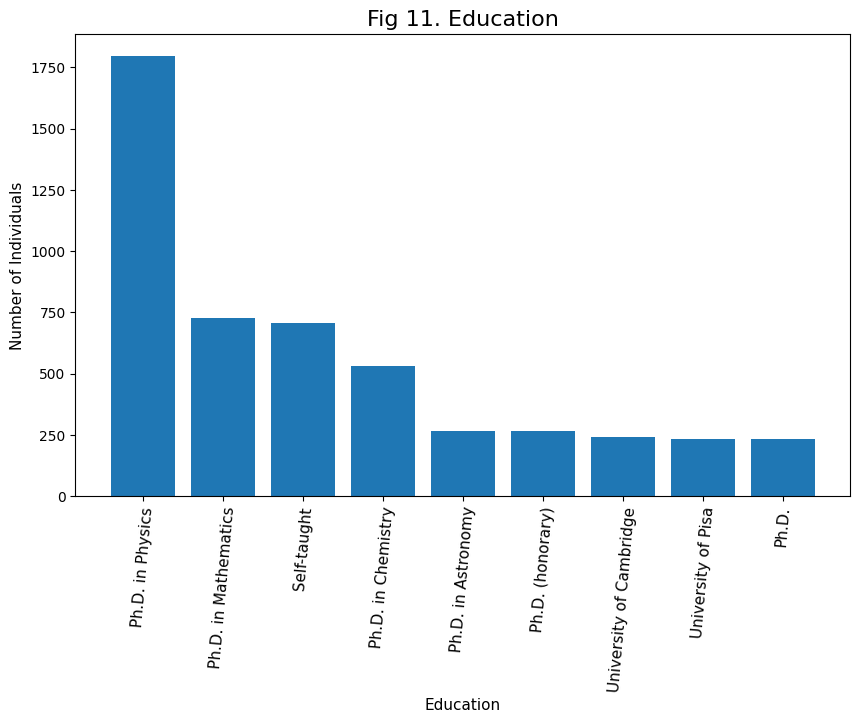

In [188]:
plt.figure(figsize = (10,6))
plt.bar(education_count.index, education_count)
plt.title("Fig 11. Education", fontsize=16)
plt.xlabel("Education", fontsize=11)
plt.ylabel("Number of Individuals", fontsize=11)
plt.xticks(rotation=85, fontsize=11)
plt.show()

In [189]:
influence_count = df["Influence"].value_counts()
influence_count

Influence
Foundational work in quantum mechanics            472
Revolutionized modern physics                     280
Laid the groundwork for modern computing          278
Evolutionary biology pioneer                      273
Iconic Renaissance artist and inventor            255
Contributions to cosmology and quantum gravity    255
Quantum electrodynamics and physics teaching      254
Popularizing science and cosmology                253
Discovery of electromagnetic induction            253
Developed quantum theory                          251
Wave mechanics in quantum physics                 247
Pioneering research in radioactivity              247
Early pioneer of computer science                 247
Foundation of classical mechanics                 243
Nuclear physics and reactor development           242
Inventor and electrical engineering pioneer       239
Major advancements in astronomy                   238
Unified theory of electromagnetism                238
Penrose's work on 

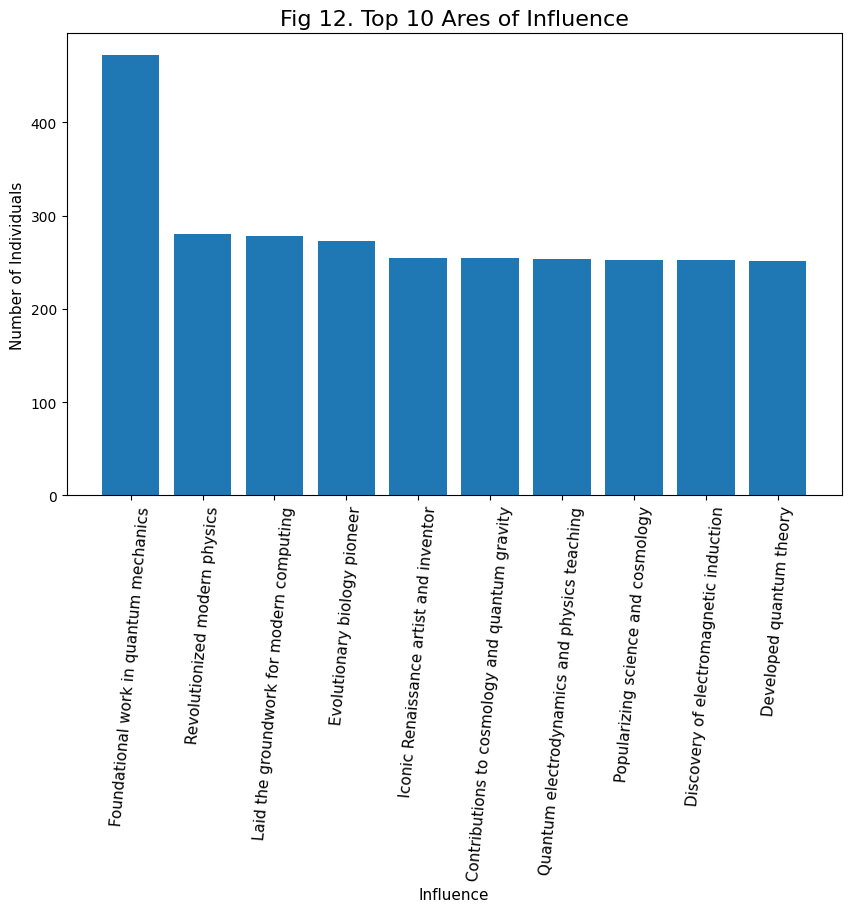

In [190]:
plt.figure(figsize = (10,6))
plt.bar(influence_count.index[:10], influence_count[:10])
plt.title("Fig 12. Top 10 Ares of Influence", fontsize=16)
plt.xlabel("Influence", fontsize=11)
plt.ylabel("Number of Individuals", fontsize=11)
plt.xticks(rotation=85, fontsize=11)
plt.show()

In [223]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [227]:
notable_works_count

Notable Works
Dirac Equation                                     284
Quantum Theory                                     278
Cosmos                                             277
Discovery of Electromagnetic Induction             266
On the Origin of Species                           265
Research on radioactivity                          259
Fermi Paradox                                      254
Dialogue Concerning the Two Chief World Systems    252
Bohr Model                                         251
Vitruvian Man                                      248
Philosophiæ Naturalis Principia Mathematica        244
On Computable Numbers                              241
Various Patents                                    241
Feynman Lectures                                   238
Penrose Diagram                                    235
Notes on the Analytical Engine                     235
A Brief History of Time                            234
Theory of Electromagnetism                         

In [243]:
all_words = ' '.join(df['Notable Works'])
tokens = word_tokenize(all_words)
filtered_tokens = [word for word in tokens if word.isalpha()]
not_useful = ['discovery', 'equation', 'research', 'paradox', 'theory']
stop_words = list(punctuation) + stopwords.words('english') + not_useful
filtered_tokens = [word for word in filtered_tokens if word.lower() not in stop_words]
word_freq = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_freq.most_common(15)
print(most_common_words)

[('Dirac', 284), ('Quantum', 278), ('Cosmos', 277), ('Electromagnetic', 266), ('Induction', 266), ('Origin', 265), ('Species', 265), ('radioactivity', 259), ('Fermi', 254), ('Dialogue', 252), ('Concerning', 252), ('Two', 252), ('Chief', 252), ('World', 252), ('Systems', 252)]


In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# numerical features used for clustering
features = df[['IQ', 'Birth Year', 'Gender']].copy()
features['Gender'] = features['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# apply k-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)
features.groupby('Cluster').mean()

,IQ,Birth Year,Gender
Cluster,,,
0,177.522277,1976.960396,0.0
1,147.383321,1948.205050,1.0
2,183.332777,1951.648874,1.0
3,143.677859,1946.035677,0.0
4,178.740791,1922.714870,0.0


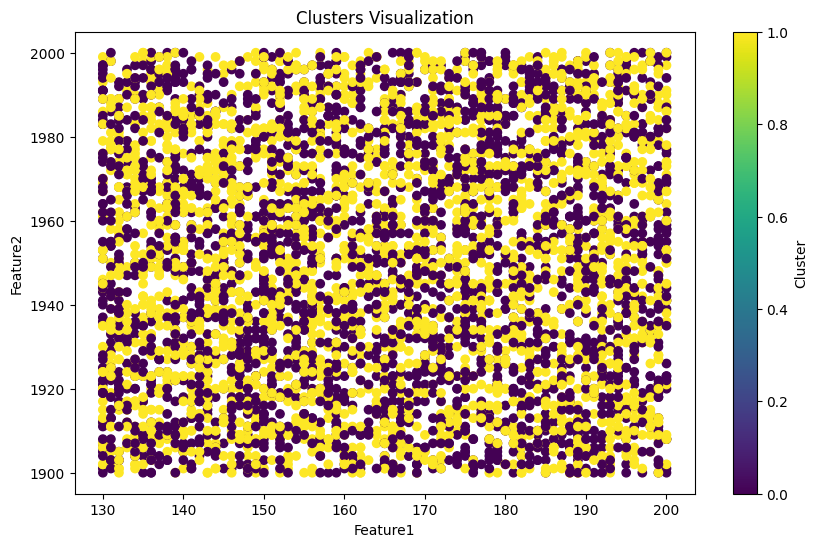

In [211]:
plt.figure(figsize=(10, 6))
plt.scatter(features['IQ'], features['Birth Year'], c=features['Gender'], cmap='viridis', marker='o')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features_2 = features[['IQ', 'Birth Year', 'Gender']].copy()
target = df['Field of Expertise']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Astronomy       0.07      0.06      0.07       149
     Biology       0.05      0.04      0.04        73
   Chemistry       0.07      0.05      0.06       155
 Engineering       0.02      0.01      0.01        84
 Mathematics       0.22      0.19      0.20       293
     Physics       0.43      0.55      0.48       665
    Polymath       0.05      0.02      0.03        81

    accuracy                           0.29      1500
   macro avg       0.13      0.13      0.13      1500
weighted avg       0.25      0.29      0.27      1500



In [212]:
education_mapping = {
    "Ph.D. in Physics": 1,
    "Ph.D. in Mathematics": 2,
    "Self-taught": 3,
    "Ph.D. in Chemistry": 4,
    "Ph.D. in Astronomy": 5,
    "Ph.D. (honorary)": 6,
    "University of Cambridge": 7,
    "University of Pisa": 8,
    "Ph.D.": 9
}

df['Education_Numeric'] = df['Education'].map(education_mapping)


In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = df[['Birth Year', 'Gender', 'Education_Numeric']].copy()
features['Gender'] = features['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
target = df['IQ']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Train a LinearRegression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 419.43711336762397


In [245]:
influence_count

Influence
Foundational work in quantum mechanics            472
Revolutionized modern physics                     280
Laid the groundwork for modern computing          278
Evolutionary biology pioneer                      273
Iconic Renaissance artist and inventor            255
Contributions to cosmology and quantum gravity    255
Quantum electrodynamics and physics teaching      254
Popularizing science and cosmology                253
Discovery of electromagnetic induction            253
Developed quantum theory                          251
Wave mechanics in quantum physics                 247
Pioneering research in radioactivity              247
Early pioneer of computer science                 247
Foundation of classical mechanics                 243
Nuclear physics and reactor development           242
Inventor and electrical engineering pioneer       239
Major advancements in astronomy                   238
Unified theory of electromagnetism                238
Penrose's work on 

## Conclusion

---



## Sources

---



["Top Intelligent People in the World" dataset link](https://www.kaggle.com/datasets/waqi786/top-intelligent-people-in-the-world/data)